**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

**1**. (20 points)

Find the gradient and Hessian for the following equation

$$
f(x, y) = 1 + 2x + 3y + 4x^2 + 2xy + y^2
$$

- Plot the contours of this function using `matplotlib` in the box $-5 \le x \le 5$ and $-5 \le y \le 5$ using a $100 \times 100$ grid. 
- Then plot the gradient vectors using the `quiver` function on top of the contour plot using a $10 \times 10$ grid. Are the gradients orthogonal to the contours?

Hint: Use `numpy.meshgrid`, `matplotlib.contour` and `matplotllib.quiver`.

Gradient is

$$
\begin{bmatrix}
2 + 8x + 2y \\
3 + 2x + 2y
\end{bmatrix}
$$

Hessian is
$$
\begin{bmatrix}
8 & 2 \\
2 & 2
\end{bmatrix}
$$



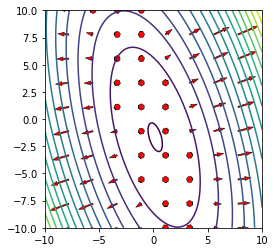

In [2]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = 1 + 2*X + 3*Y + 4*X**2 + 2*X*Y + Y**2
plt.contour(X, Y, Z, 15)

x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(x, y)
U = 2 + 8*X + 2*Y
V = 3 + 2*X + 2*Y
plt.quiver(X, Y, U, V, edgecolor='k', facecolor='r', linewidth=.5, minlength=5)

plt.axis('square')
pass

**2**. (30 points)

This exercise is about using Newton's method to find the cube roots of unity - find $z$ such that $z^3 = 1$. From the fundamental theorem of algebra, we know there must be exactly 3 complex roots since this is a degree 3 polynomial.

We start with Euler's equation
$$
e^{ix} = \cos x + i \sin x
$$

Raising $e^{ix}$ to the $n$th power where $n$ is an integer, we get from Euler's formula with $nx$ substituting for $x$
$$
(e^{ix})^n = e^{i(nx)} = \cos nx + i \sin nx
$$

Whenever $nx$ is an integer multiple of $2\pi$, we have
$$
\cos nx + i \sin nx = 1
$$

So
$$
e^{2\pi i \frac{k}{n}}
$$
is a root of 1 whenever $k/n = 0, 1, 2, \ldots$.

So the cube roots of unity are $1, e^{2\pi i/3}, e^{4\pi i/3}$. 

While we can do this analytically, the idea is to use Newton's method to find these roots, and in the process, discover some rather perplexing behavior of Newton's method.

In [3]:
from sympy import Symbol, exp, I, pi, N, expand

In [4]:
expand(exp(2*pi*I/3), complex=True)

-1/2 + sqrt(3)*I/2

In [5]:
expand(exp(4*pi*I/3), complex=True)

-1/2 - sqrt(3)*I/2

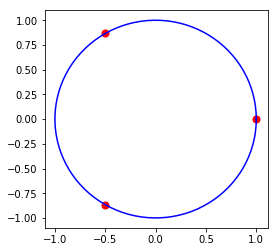

In [6]:
plt.figure(figsize=(4,4))
roots = np.array([[1,0], [-0.5, np.sqrt(3)/2], [-0.5, -np.sqrt(3)/2]])
plt.scatter(roots[:,0], roots[:,1], s=50, c='red')
xp = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(xp), np.sin(xp), c='blue');

Newton's method for functions of complex variables - stability and basins of attraction. (30 points)

1. Write a function with the following function signature `newton(z, f, fprime, max_iter=100, tol=1e-6)` where
    - `z` is a starting value (a complex number e.g.  ` 3 + 4j`)
    - `f` is a function of `z`
    - `fprime` is the derivative of  `f`
The function will run until either max_iter is reached or the absolute value of the Newton step is less than tol. In either case, the function should return the number of iterations taken and the final value of `z` as a tuple (`i`, `z`). 

2. Define the function `f` and `fprime` that will result in Newton's method finding the cube roots of 1. Find 3 starting points that will give different roots, and print both the start and end points. 

Write the following two plotting functions to see some (pretty) aspects of Newton's algorithm in the complex plane.

3. The first function `plot_newton_iters(f, fprime, n=200, extent=[-1,1,-1,1], cmap='hsv')` calculates and stores the number of iterations taken for convergence (or max_iter) for each point in a 2D array. The 2D array limits are given by `extent` - for example, when `extent = [-1,1,-1,1]` the corners of the plot are `(-i, -i), (1, -i), (1, i), (-1, i)`. There are `n` grid points in both the real and imaginary axes. The argument `cmap` specifies the color map to use - the suggested defaults are fine. Finally plot the image using `plt.imshow` - make sure the axis ticks are correctly scaled. Make a plot for the cube roots of 1.

4. The second function `plot_newton_basins(f, fprime, n=200, extent=[-1,1,-1,1], cmap='jet')` has the same arguments, but this time the grid stores the identity of the root that the starting point converged to. Make a plot for the cube roots of 1 - since there are 3 roots, there should be only 3 colors in the plot.

In [7]:
def newton(z, f, fprime, max_iter=100, tol=1e-6):
    """The Newton-Raphson method."""
    for i in range(max_iter):
        step = f(z)/fprime(z)
        if abs(step) < tol:
            return i, z
        z -= step
    return i, z

In [8]:
def plot_newton_iters(p, pprime, n=200, extent=[-1,1,-1,1], cmap='hsv'):
    """Shows how long it takes to converge to a root using the Newton-Rahphson method."""
    m = np.zeros((n,n))
    xmin, xmax, ymin, ymax = extent
    for r, x in enumerate(np.linspace(xmin, xmax, n)):
        for s, y in enumerate(np.linspace(ymin, ymax, n)):
            z = x + y*1j
            m[s, r] = newton(z, p, pprime)[0]
    plt.imshow(m, cmap=cmap, extent=extent)

In [9]:
def plot_newton_basins(p, pprime, n=200, extent=[-1,1,-1,1], cmap='jet'):
    """Shows basin of attraction for convergence to each root using the Newton-Raphson method."""
    root_count = 0
    roots = {}

    m = np.zeros((n,n))
    xmin, xmax, ymin, ymax = extent
    for r, x in enumerate(np.linspace(xmin, xmax, n)):
        for s, y in enumerate(np.linspace(ymin, ymax, n)):
            z = x + y*1j
            root = np.round(newton(z, p, pprime)[1], 1)
            if not root in roots:
                roots[root] = root_count
                root_count += 1
            m[s, r] = roots[root]
    plt.imshow(m, cmap=cmap, extent=extent)

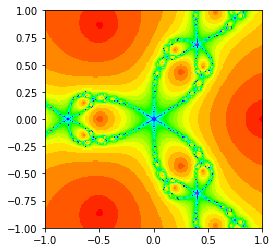

In [10]:
plt.grid('off')
plot_newton_iters(lambda x: x**3 - 1, lambda x: 3*x**2)

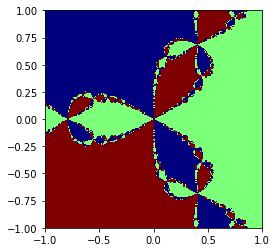

In [11]:
plt.grid('off')
m = plot_newton_basins(lambda x: x**3 - 1, lambda x: 3*x**2)

**3**. (20 points)

Consider the following function on $\mathbb{R}^2$:

$$
f(x_1,x_2) = -x_1x_2e^{-\frac{(x_1^2+x_2^2)}{2}}
$$

- Find the minimum under the constraint 
$$g(x) = x_1^2+x_2^2 \leq 10$$
and 
$$h(x) = 2x_1 + 3x_2 = 5$$ using `scipy.optimize.minimize`.
- Plot the function contours using `matplotlib`, showing the constraints $g$ and $h$ and indicate the constrained minimum with an `X`.

In [12]:
import scipy.optimize as opt

In [13]:
def f(x):
    return -x[0] * x[1] * np.exp(-(x[0]**2+x[1]**2)/2)

cons = ({'type': 'eq',
         'fun' : lambda x: np.array([2.0*x[0] + 3.0*x[1] - 5.0]),
         'jac' : lambda x: np.array([2.0,3.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([-x[0]**2.0 - x[1]**2.0 + 10.0])})

x0 = [1.5,1.5]
cx = opt.minimize(f, x0, constraints=cons)

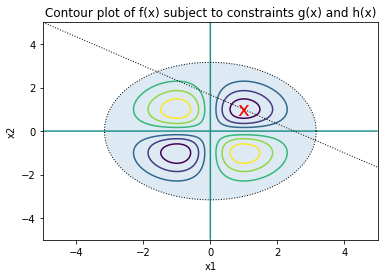

In [14]:
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((200,200))
plt.contour(X, Y, Z)

# g constraint
plt.plot(x, (5-2*x)/3, 'k:', linewidth=1)

# h constraint
theta = np.linspace(0, 2*np.pi, 100)
x = np.sqrt(10) * np.cos(theta)
y = np.sqrt(10) * np.sin(theta)
plt.plot(x, y, 'k:', linewidth=1)
plt.fill_between(x,y,alpha=0.15)
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.axis([-5,5,-5,5])
plt.title('Contour plot of f(x) subject to constraints g(x) and h(x)')
plt.xlabel('x1')
plt.ylabel('x2')
pass

**4** (30 points)

Find solutions to $x^3 + 4x^2 -3 = x$. 

- Write a function to find brackets, assuming roots are always at least 1 unit apart and that the roots lie between -10 and 10
- For each bracket, find the enclosed root using
    - a bisection method
    - Newton-Raphson (no guarantee to stay within brackets)
- Use the end points of the bracket as starting points for the bisection methods and the midpoint for Newton-Raphson.
- Use the companion matrix and characteristic polynomial to find the solutions
- Plot the function and its roots (marked with a circle) in a window just large enough to contain all roots.

Use a tolerance of 1e-6.

In [15]:
def f(x):
    """Fucntion to find zeros for."""
    
    return x**3 + 4*x**2 -x - 3

In [16]:
def fp(x):
    """Derivative of f."""
    return 3*x**2 + 8*x -1

### Bracketing function

In [17]:
def bracket(f, start, stop, step):
    """Find brackets where end points have different signs."""
    
    brackets = []
    for a in np.arange(start, stop, step):
        b = a + step
        if f(a) * f(b) < 0:
            brackets.append([a, b])
    return brackets

In [18]:
brackets = bracket(f, -10, 10, 1)
brackets

[[-5, -4], [-1, 0], [0, 1]]

### Bisection

In [19]:
def bisect(f, a, b, tol=1e-6):
    """Bisection method."""
       
    while np.abs(b - a) >= tol:
        c = (a + b)/2   
        if (f(a) * f(c )) < 0:
            b = c
        else:
            a = c
    return c

In [20]:
for bracket in brackets:
    a, b = bracket
    x = bisect(f, a, b)
    print(x)

-4.064435005187988
-0.827519416809082
0.8919553756713867


### Newton-Raphson

In [21]:
def newton(f, fp, x, tol=1e-6):
    """Newton Raphson method."""
    
    while np.abs(f(x)) >= tol:
        x = x - f(x)/fp(x)
    return x

In [22]:
for bracket in brackets:
    a, b = bracket
    x = (a + b)/2
    x = newton(f, fp, x)
    print(x)

-4.064434533802053
-0.8275200557849137
0.8919544406642576


### Companion matrix

In [23]:
A = np.array([
    [-4, 1, 3],
    [1,0,0],
    [0,1,0]
])

In [24]:
roots = np.linalg.eigvals(A)
roots

array([-4.06443453,  0.89195444, -0.82751991])

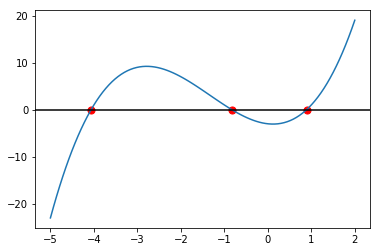

In [25]:
x = np.linspace(-5, 2, 100)
plt.plot(x, f(x))
plt.axhline(0, c='black')
plt.scatter(roots, np.zeros_like(roots), s=50, c='red')
pass